In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **TEMP ALG4**

In [ ]:
import pandas as pd
 
temp_alg4 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg4.csv")
temp_alg4 = temp_alg4.drop(['Unnamed: 0'], axis=1)
print(temp_alg4)

     id  alg  time    3    4    5    6    7    8    9  ...  69993  69994  \
0     1    4     1  937  937  937  937  938  937  937  ...    938    937   
1     1    4     2  937  937  937  939  938  938  938  ...    938    937   
2     1    4     3  937  938  937  938  938  937  938  ...    936    936   
3     1    4     4  938  938  937  937  937  937  937  ...    937    937   
4     1    4     5  937  936  937  937  936  936  936  ...    937    937   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    4   996  939  937  938  940  940  939  938  ...    937    939   
996  10    4   997  939  941  940  942  937  939  939  ...    941    940   
997  10    4   998  939  939  938  940  938  939  940  ...    939    938   
998  10    4   999  938  940  939  939  939  940  939  ...    941    940   
999  10    4  1000  940  939  941  941  940  939  939  ...    939    939   

     69995  69996  69997  69998  69999  70000  70001  70002  
0      936    938    937 

In [ ]:
temp_alg4_diezmado = []
for i in range(len(temp_alg4)):
  if(i % 10 == 0):
    temp_alg4_diezmado = np.append(temp_alg4_diezmado, temp_alg4.iloc[i], axis = 0)
temp_alg4_diezmado = np.reshape(temp_alg4_diezmado, (100,70003))
temp_alg4_diezmado = pd.DataFrame(temp_alg4_diezmado)
print(temp_alg4_diezmado)

    0      1      2      3      4      5      6      7      8      9      ...  \
0     1.0    4.0    1.0  937.0  937.0  937.0  937.0  938.0  937.0  937.0  ...   
1     1.0    4.0   11.0  938.0  937.0  937.0  938.0  938.0  937.0  938.0  ...   
2     1.0    4.0   21.0  938.0  938.0  939.0  937.0  935.0  937.0  936.0  ...   
3     1.0    4.0   31.0  938.0  938.0  938.0  938.0  937.0  938.0  939.0  ...   
4     1.0    4.0   41.0  937.0  938.0  937.0  937.0  937.0  937.0  937.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95   10.0    4.0  951.0  933.0  933.0  935.0  934.0  933.0  935.0  934.0  ...   
96   10.0    4.0  961.0  937.0  939.0  940.0  938.0  939.0  939.0  938.0  ...   
97   10.0    4.0  971.0  939.0  940.0  938.0  939.0  939.0  938.0  939.0  ...   
98   10.0    4.0  981.0  940.0  938.0  938.0  939.0  939.0  940.0  939.0  ...   
99   10.0    4.0  991.0  940.0  938.0  938.0  939.0  939.0  939.0  939.0  ...   

    69993  69994  69995  69

In [ ]:
Y = temp_alg4_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = temp_alg4_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,69993,69994,69995,69996,69997,69998,69999,70000,70001,70002
0,937.0,937.0,937.0,937.0,938.0,937.0,937.0,936.0,937.0,937.0,...,938.0,937.0,936.0,938.0,937.0,938.0,938.0,939.0,938.0,937.0
1,938.0,937.0,937.0,938.0,938.0,937.0,938.0,938.0,937.0,937.0,...,936.0,937.0,936.0,935.0,937.0,936.0,938.0,936.0,937.0,936.0
2,938.0,938.0,939.0,937.0,935.0,937.0,936.0,939.0,938.0,939.0,...,938.0,937.0,940.0,936.0,936.0,939.0,938.0,937.0,939.0,937.0
3,938.0,938.0,938.0,938.0,937.0,938.0,939.0,937.0,937.0,939.0,...,937.0,937.0,937.0,936.0,938.0,938.0,938.0,937.0,937.0,938.0
4,937.0,938.0,937.0,937.0,937.0,937.0,937.0,937.0,938.0,937.0,...,939.0,937.0,936.0,936.0,937.0,937.0,937.0,937.0,938.0,937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,933.0,933.0,935.0,934.0,933.0,935.0,934.0,933.0,935.0,933.0,...,935.0,936.0,938.0,935.0,936.0,935.0,935.0,935.0,936.0,935.0
96,937.0,939.0,940.0,938.0,939.0,939.0,938.0,938.0,938.0,938.0,...,939.0,938.0,939.0,938.0,939.0,939.0,939.0,938.0,938.0,941.0
97,939.0,940.0,938.0,939.0,939.0,938.0,939.0,938.0,939.0,939.0,...,939.0,938.0,940.0,940.0,938.0,938.0,938.0,939.0,940.0,939.0
98,940.0,938.0,938.0,939.0,939.0,940.0,939.0,939.0,939.0,939.0,...,939.0,939.0,939.0,940.0,939.0,940.0,938.0,939.0,937.0,939.0


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

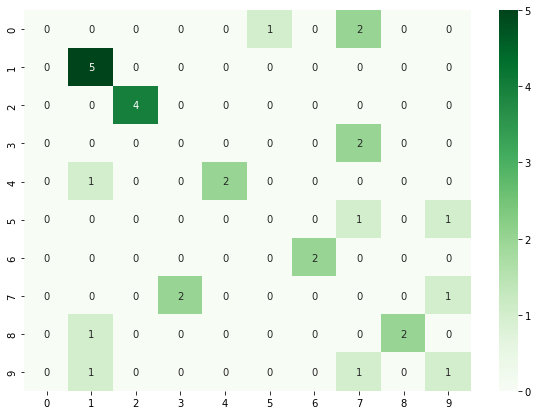

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.62      1.00      0.77         5
         3.0       1.00      1.00      1.00         4
         4.0       0.00      0.00      0.00         2
         5.0       1.00      0.67      0.80         3
         6.0       0.00      0.00      0.00         2
         7.0       1.00      1.00      1.00         2
         8.0       0.00      0.00      0.00         3
         9.0       1.00      0.67      0.80         3
        10.0       0.33      0.33      0.33         3

    accuracy                           0.53        30
   macro avg       0.50      0.47      0.47        30
weighted avg       0.54      0.53      0.52        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


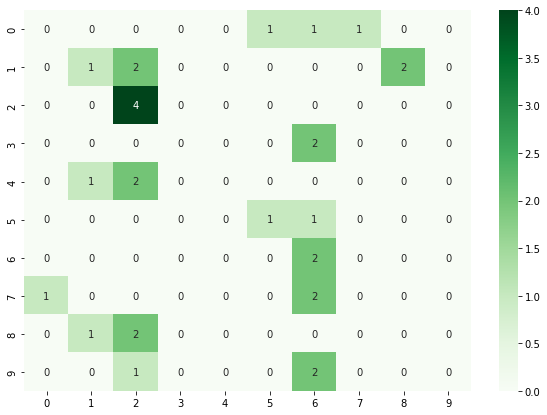

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.33      0.20      0.25         5
         3.0       0.36      1.00      0.53         4
         4.0       0.00      0.00      0.00         2
         5.0       0.00      0.00      0.00         3
         6.0       0.50      0.50      0.50         2
         7.0       0.20      1.00      0.33         2
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         3
        10.0       0.00      0.00      0.00         3

    accuracy                           0.27        30
   macro avg       0.14      0.27      0.16        30
weighted avg       0.15      0.27      0.17        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **VOLT ALG4**

In [ ]:
import pandas as pd
 
volt_alg4 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg4.csv")
volt_alg4 = volt_alg4.drop(['Unnamed: 0'], axis=1)
print(volt_alg4)

     id  alg  time     3     4     5     6     7     8     9  ...  69993  \
0     1    4     1  1489  1489  1490  1490  1490  1489  1489  ...   1490   
1     1    4     2  1489  1490  1489  1490  1492  1491  1491  ...   1490   
2     1    4     3  1489  1489  1489  1489  1489  1490  1490  ...   1490   
3     1    4     4  1489  1490  1490  1490  1492  1490  1490  ...   1488   
4     1    4     5  1490  1490  1490  1489  1490  1490  1490  ...   1489   
..   ..  ...   ...   ...   ...   ...   ...   ...   ...   ...  ...    ...   
995  10    4   996  1503  1502  1502  1504  1503  1502  1503  ...   1502   
996  10    4   997  1503  1503  1503  1503  1503  1502  1504  ...   1502   
997  10    4   998  1503  1503  1503  1501  1503  1502  1503  ...   1502   
998  10    4   999  1503  1503  1503  1503  1503  1502  1504  ...   1503   
999  10    4  1000  1502  1503  1503  1503  1504  1504  1504  ...   1503   

     69994  69995  69996  69997  69998  69999  70000  70001  70002  
0     1490   1490 

In [ ]:
volt_alg4_diezmado = []
for i in range(len(volt_alg4)):
  if(i % 10 == 0):
    volt_alg4_diezmado = np.append(volt_alg4_diezmado, volt_alg4.iloc[i], axis = 0)
volt_alg4_diezmado = np.reshape(volt_alg4_diezmado, (100,70003))
volt_alg4_diezmado = pd.DataFrame(volt_alg4_diezmado)
print(volt_alg4_diezmado)

    0      1      2       3       4       5       6       7       8      \
0     1.0    4.0    1.0  1489.0  1489.0  1490.0  1490.0  1490.0  1489.0   
1     1.0    4.0   11.0  1489.0  1490.0  1491.0  1490.0  1490.0  1490.0   
2     1.0    4.0   21.0  1489.0  1490.0  1490.0  1490.0  1489.0  1490.0   
3     1.0    4.0   31.0  1490.0  1490.0  1491.0  1490.0  1490.0  1490.0   
4     1.0    4.0   41.0  1490.0  1490.0  1490.0  1490.0  1492.0  1490.0   
..    ...    ...    ...     ...     ...     ...     ...     ...     ...   
95   10.0    4.0  951.0  1502.0  1503.0  1502.0  1504.0  1502.0  1503.0   
96   10.0    4.0  961.0  1503.0  1503.0  1503.0  1503.0  1505.0  1504.0   
97   10.0    4.0  971.0  1503.0  1503.0  1503.0  1503.0  1501.0  1502.0   
98   10.0    4.0  981.0  1502.0  1502.0  1503.0  1503.0  1503.0  1505.0   
99   10.0    4.0  991.0  1503.0  1503.0  1501.0  1503.0  1502.0  1503.0   

     9      ...   69993   69994   69995   69996   69997   69998   69999  \
0   1489.0  ...  1490.0 

In [ ]:
Y = volt_alg4_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = volt_alg4_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,69993,69994,69995,69996,69997,69998,69999,70000,70001,70002
0,1489.0,1489.0,1490.0,1490.0,1490.0,1489.0,1489.0,1489.0,1490.0,1490.0,...,1490.0,1490.0,1490.0,1491.0,1490.0,1489.0,1490.0,1490.0,1490.0,1490.0
1,1489.0,1490.0,1491.0,1490.0,1490.0,1490.0,1490.0,1491.0,1489.0,1489.0,...,1489.0,1490.0,1490.0,1492.0,1490.0,1491.0,1488.0,1490.0,1488.0,1489.0
2,1489.0,1490.0,1490.0,1490.0,1489.0,1490.0,1489.0,1489.0,1489.0,1490.0,...,1490.0,1490.0,1489.0,1489.0,1489.0,1490.0,1489.0,1490.0,1491.0,1489.0
3,1490.0,1490.0,1491.0,1490.0,1490.0,1490.0,1489.0,1489.0,1489.0,1490.0,...,1489.0,1490.0,1492.0,1491.0,1490.0,1491.0,1491.0,1490.0,1490.0,1490.0
4,1490.0,1490.0,1490.0,1490.0,1492.0,1490.0,1491.0,1489.0,1490.0,1490.0,...,1489.0,1490.0,1489.0,1491.0,1490.0,1492.0,1489.0,1490.0,1489.0,1490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1502.0,1503.0,1502.0,1504.0,1502.0,1503.0,1504.0,1503.0,1502.0,1503.0,...,1502.0,1502.0,1504.0,1503.0,1503.0,1502.0,1505.0,1502.0,1504.0,1503.0
96,1503.0,1503.0,1503.0,1503.0,1505.0,1504.0,1504.0,1501.0,1503.0,1503.0,...,1503.0,1504.0,1502.0,1502.0,1503.0,1502.0,1505.0,1503.0,1505.0,1503.0
97,1503.0,1503.0,1503.0,1503.0,1501.0,1502.0,1502.0,1504.0,1502.0,1503.0,...,1503.0,1503.0,1502.0,1504.0,1502.0,1501.0,1502.0,1503.0,1502.0,1502.0
98,1502.0,1502.0,1503.0,1503.0,1503.0,1505.0,1503.0,1503.0,1502.0,1503.0,...,1502.0,1503.0,1501.0,1505.0,1503.0,1503.0,1503.0,1502.0,1502.0,1502.0


### **kNN**

In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

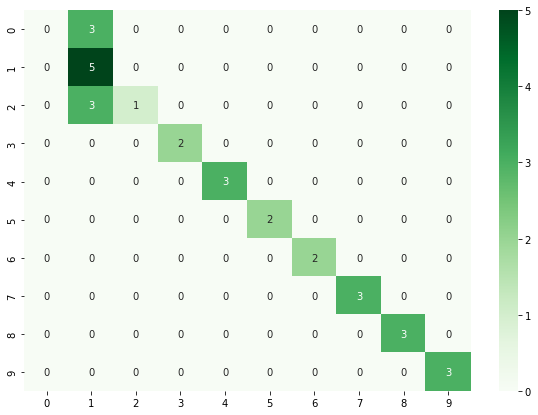

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.45      1.00      0.62         5
         3.0       1.00      0.25      0.40         4
         4.0       1.00      1.00      1.00         2
         5.0       1.00      1.00      1.00         3
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         3
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.80        30
   macro avg       0.85      0.82      0.80        30
weighted avg       0.81      0.80      0.76        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


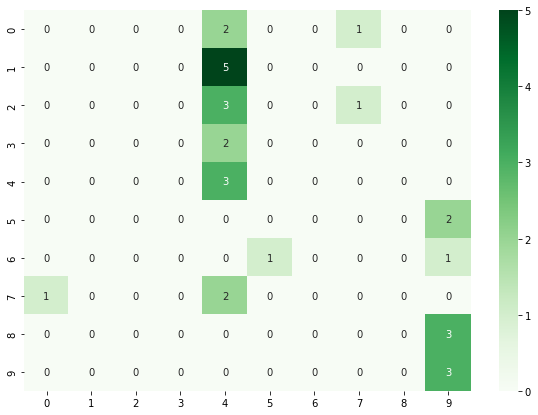

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00         5
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         2
         5.0       0.18      1.00      0.30         3
         6.0       0.00      0.00      0.00         2
         7.0       0.00      0.00      0.00         2
         8.0       0.00      0.00      0.00         3
         9.0       0.00      0.00      0.00         3
        10.0       0.33      1.00      0.50         3

    accuracy                           0.20        30
   macro avg       0.05      0.20      0.08        30
weighted avg       0.05      0.20      0.08        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ALGORITMO 4**

In [ ]:
import pandas as pd

temp_alg4 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/temp_alg4.csv")
temp_alg4 = temp_alg4.drop(['Unnamed: 0'], axis=1)
print(temp_alg4)

volt_alg4 = pd.read_csv("/content/drive/MyDrive/simulaciones/csv_tfg/volt_alg4.csv")
volt_alg4 = volt_alg4.drop(['Unnamed: 0', 'id', 'alg'], axis=1)
print(volt_alg4)

     id  alg  time    3    4    5    6    7    8    9  ...  69993  69994  \
0     1    4     1  937  937  937  937  938  937  937  ...    938    937   
1     1    4     2  937  937  937  939  938  938  938  ...    938    937   
2     1    4     3  937  938  937  938  938  937  938  ...    936    936   
3     1    4     4  938  938  937  937  937  937  937  ...    937    937   
4     1    4     5  937  936  937  937  936  936  936  ...    937    937   
..   ..  ...   ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
995  10    4   996  939  937  938  940  940  939  938  ...    937    939   
996  10    4   997  939  941  940  942  937  939  939  ...    941    940   
997  10    4   998  939  939  938  940  938  939  940  ...    939    938   
998  10    4   999  938  940  939  939  939  940  939  ...    941    940   
999  10    4  1000  940  939  941  941  940  939  939  ...    939    939   

     69995  69996  69997  69998  69999  70000  70001  70002  
0      936    938    937 

In [ ]:
alg4 = pd.merge(temp_alg4, volt_alg4, on='time', suffixes=('_1', '_2'))
alg4

alg4_diezmado = []
for i in range(len(alg4)):
  if(i % 10 == 0):
    alg4_diezmado = np.append(alg4_diezmado, alg4.iloc[i], axis = 0)
alg4_diezmado = np.reshape(alg4_diezmado, (100,140003))
alg4_diezmado = pd.DataFrame(alg4_diezmado)
print(alg4_diezmado)

    0       1       2       3       4       5       6       7       8       \
0      1.0     4.0     1.0   937.0   937.0   937.0   937.0   938.0   937.0   
1      1.0     4.0    11.0   938.0   937.0   937.0   938.0   938.0   937.0   
2      1.0     4.0    21.0   938.0   938.0   939.0   937.0   935.0   937.0   
3      1.0     4.0    31.0   938.0   938.0   938.0   938.0   937.0   938.0   
4      1.0     4.0    41.0   937.0   938.0   937.0   937.0   937.0   937.0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
95    10.0     4.0   951.0   933.0   933.0   935.0   934.0   933.0   935.0   
96    10.0     4.0   961.0   937.0   939.0   940.0   938.0   939.0   939.0   
97    10.0     4.0   971.0   939.0   940.0   938.0   939.0   939.0   938.0   
98    10.0     4.0   981.0   940.0   938.0   938.0   939.0   939.0   940.0   
99    10.0     4.0   991.0   940.0   938.0   938.0   939.0   939.0   939.0   

    9       ...  139993  139994  139995  139996  139997  139998

In [ ]:
Y = alg4_diezmado.iloc[:,0]
Y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
95    10.0
96    10.0
97    10.0
98    10.0
99    10.0
Name: 0, Length: 100, dtype: float64

In [ ]:
X = alg4_diezmado.iloc[:, 3:]
X

,3,4,5,6,7,8,9,10,11,12,...,139993,139994,139995,139996,139997,139998,139999,140000,140001,140002
0,937.0,937.0,937.0,937.0,938.0,937.0,937.0,936.0,937.0,937.0,...,1490.0,1490.0,1490.0,1491.0,1490.0,1489.0,1490.0,1490.0,1490.0,1490.0
1,938.0,937.0,937.0,938.0,938.0,937.0,938.0,938.0,937.0,937.0,...,1489.0,1490.0,1490.0,1492.0,1490.0,1491.0,1488.0,1490.0,1488.0,1489.0
2,938.0,938.0,939.0,937.0,935.0,937.0,936.0,939.0,938.0,939.0,...,1490.0,1490.0,1489.0,1489.0,1489.0,1490.0,1489.0,1490.0,1491.0,1489.0
3,938.0,938.0,938.0,938.0,937.0,938.0,939.0,937.0,937.0,939.0,...,1489.0,1490.0,1492.0,1491.0,1490.0,1491.0,1491.0,1490.0,1490.0,1490.0
4,937.0,938.0,937.0,937.0,937.0,937.0,937.0,937.0,938.0,937.0,...,1489.0,1490.0,1489.0,1491.0,1490.0,1492.0,1489.0,1490.0,1489.0,1490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,933.0,933.0,935.0,934.0,933.0,935.0,934.0,933.0,935.0,933.0,...,1502.0,1502.0,1504.0,1503.0,1503.0,1502.0,1505.0,1502.0,1504.0,1503.0
96,937.0,939.0,940.0,938.0,939.0,939.0,938.0,938.0,938.0,938.0,...,1503.0,1504.0,1502.0,1502.0,1503.0,1502.0,1505.0,1503.0,1505.0,1503.0
97,939.0,940.0,938.0,939.0,939.0,938.0,939.0,938.0,939.0,939.0,...,1503.0,1503.0,1502.0,1504.0,1502.0,1501.0,1502.0,1503.0,1502.0,1502.0
98,940.0,938.0,938.0,939.0,939.0,940.0,939.0,939.0,939.0,939.0,...,1502.0,1503.0,1501.0,1505.0,1503.0,1503.0,1503.0,1502.0,1502.0,1502.0


### **kNN**


In [ ]:
skf = StratifiedKFold(n_splits=2)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
classifier = KNeighborsClassifier(n_neighbors=4)
#fit the model using the training data
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

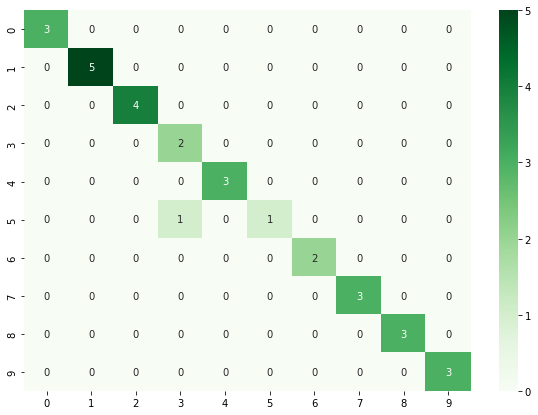

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         4
         4.0       0.67      1.00      0.80         2
         5.0       1.00      1.00      1.00         3
         6.0       1.00      0.50      0.67         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         3
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.95        30
weighted avg       0.98      0.97      0.96        30



### **Regresión Logística**

In [ ]:
skf = StratifiedKFold(n_splits=4)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#define metrics
y_pred = log_regression.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


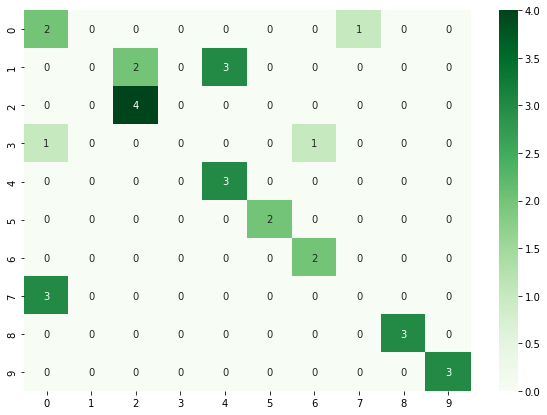

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)


df_cm = pd.DataFrame(conf_matrix, range(10), range(10))
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, cmap = 'Greens', annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.33      0.67      0.44         3
         2.0       0.00      0.00      0.00         5
         3.0       0.67      1.00      0.80         4
         4.0       0.00      0.00      0.00         2
         5.0       0.50      1.00      0.67         3
         6.0       1.00      1.00      1.00         2
         7.0       0.67      1.00      0.80         2
         8.0       0.00      0.00      0.00         3
         9.0       1.00      1.00      1.00         3
        10.0       1.00      1.00      1.00         3

    accuracy                           0.63        30
   macro avg       0.52      0.67      0.57        30
weighted avg       0.48      0.63      0.54        30



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Exportar los datos**

In [ ]:
temp_alg4_diezmado.rename(columns={temp_alg4_diezmado.columns[0]:'id'}, inplace=True)
temp_alg4_diezmado.rename(columns={temp_alg4_diezmado.columns[2]:'time'}, inplace=True)
temp_alg4_diezmado

,id,1,time,3,4,5,6,7,8,9,...,69993,69994,69995,69996,69997,69998,69999,70000,70001,70002
0,1.0,4.0,1.0,937.0,937.0,937.0,937.0,938.0,937.0,937.0,...,938.0,937.0,936.0,938.0,937.0,938.0,938.0,939.0,938.0,937.0
1,1.0,4.0,11.0,938.0,937.0,937.0,938.0,938.0,937.0,938.0,...,936.0,937.0,936.0,935.0,937.0,936.0,938.0,936.0,937.0,936.0
2,1.0,4.0,21.0,938.0,938.0,939.0,937.0,935.0,937.0,936.0,...,938.0,937.0,940.0,936.0,936.0,939.0,938.0,937.0,939.0,937.0
3,1.0,4.0,31.0,938.0,938.0,938.0,938.0,937.0,938.0,939.0,...,937.0,937.0,937.0,936.0,938.0,938.0,938.0,937.0,937.0,938.0
4,1.0,4.0,41.0,937.0,938.0,937.0,937.0,937.0,937.0,937.0,...,939.0,937.0,936.0,936.0,937.0,937.0,937.0,937.0,938.0,937.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0,4.0,951.0,933.0,933.0,935.0,934.0,933.0,935.0,934.0,...,935.0,936.0,938.0,935.0,936.0,935.0,935.0,935.0,936.0,935.0
96,10.0,4.0,961.0,937.0,939.0,940.0,938.0,939.0,939.0,938.0,...,939.0,938.0,939.0,938.0,939.0,939.0,939.0,938.0,938.0,941.0
97,10.0,4.0,971.0,939.0,940.0,938.0,939.0,939.0,938.0,939.0,...,939.0,938.0,940.0,940.0,938.0,938.0,938.0,939.0,940.0,939.0
98,10.0,4.0,981.0,940.0,938.0,938.0,939.0,939.0,940.0,939.0,...,939.0,939.0,939.0,940.0,939.0,940.0,938.0,939.0,937.0,939.0


In [ ]:
volt_alg4_diezmado.rename(columns={volt_alg4_diezmado.columns[0]:'id'}, inplace=True)
volt_alg4_diezmado.rename(columns={volt_alg4_diezmado.columns[2]:'time'}, inplace=True)
volt_alg4_diezmado

,id,1,time,3,4,5,6,7,8,9,...,69993,69994,69995,69996,69997,69998,69999,70000,70001,70002
0,1.0,4.0,1.0,1489.0,1489.0,1490.0,1490.0,1490.0,1489.0,1489.0,...,1490.0,1490.0,1490.0,1491.0,1490.0,1489.0,1490.0,1490.0,1490.0,1490.0
1,1.0,4.0,11.0,1489.0,1490.0,1491.0,1490.0,1490.0,1490.0,1490.0,...,1489.0,1490.0,1490.0,1492.0,1490.0,1491.0,1488.0,1490.0,1488.0,1489.0
2,1.0,4.0,21.0,1489.0,1490.0,1490.0,1490.0,1489.0,1490.0,1489.0,...,1490.0,1490.0,1489.0,1489.0,1489.0,1490.0,1489.0,1490.0,1491.0,1489.0
3,1.0,4.0,31.0,1490.0,1490.0,1491.0,1490.0,1490.0,1490.0,1489.0,...,1489.0,1490.0,1492.0,1491.0,1490.0,1491.0,1491.0,1490.0,1490.0,1490.0
4,1.0,4.0,41.0,1490.0,1490.0,1490.0,1490.0,1492.0,1490.0,1491.0,...,1489.0,1490.0,1489.0,1491.0,1490.0,1492.0,1489.0,1490.0,1489.0,1490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10.0,4.0,951.0,1502.0,1503.0,1502.0,1504.0,1502.0,1503.0,1504.0,...,1502.0,1502.0,1504.0,1503.0,1503.0,1502.0,1505.0,1502.0,1504.0,1503.0
96,10.0,4.0,961.0,1503.0,1503.0,1503.0,1503.0,1505.0,1504.0,1504.0,...,1503.0,1504.0,1502.0,1502.0,1503.0,1502.0,1505.0,1503.0,1505.0,1503.0
97,10.0,4.0,971.0,1503.0,1503.0,1503.0,1503.0,1501.0,1502.0,1502.0,...,1503.0,1503.0,1502.0,1504.0,1502.0,1501.0,1502.0,1503.0,1502.0,1502.0
98,10.0,4.0,981.0,1502.0,1502.0,1503.0,1503.0,1503.0,1505.0,1503.0,...,1502.0,1503.0,1501.0,1505.0,1503.0,1503.0,1503.0,1502.0,1502.0,1502.0


In [ ]:
temp_alg4_diezmado.to_csv('temp_alg4_diezmado.csv')

In [ ]:
volt_alg4_diezmado.to_csv('volt_alg4_diezmado.csv')